The code in this notebook has been produced by following the tutorial in the [LangGraph's Quick Start Tutorial](https://langchain-ai.github.io/langgraph/tutorials/introduction/) 

## 0 - Setup

In [13]:
import os

from typing import Annotated

from typing_extensions import TypedDict

from langchain_openai import ChatOpenAI

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [2]:
os.environ['OPENAI_API_KEY'] = ''
os.environ['LANGCHAIN_API_KEY'] = ''
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ["TAVILY_API_KEY"] = ''
os.environ["LANGCHAIN_PROJECT"] = "LangGraph Tutorial"

## 1 - Build a Basic Chatbot

In [5]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]

In [11]:
graph_builder = StateGraph(State)

In [14]:
llm = ChatOpenAI(model="gpt-4o-mini")

In [15]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

In [16]:
# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [17]:
graph_builder.add_edge(START, "chatbot")

In [18]:
graph_builder.add_edge("chatbot", END)

In [19]:
graph = graph_builder.compile()

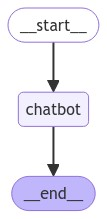

In [20]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [21]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

User:  Hi, my name is Jose


Assistant: Hi Jose! How can I assist you today?


User:  I don't know maths. Can you solve the following operation on my behalf? 2 + 2


Assistant: Sure! The result of the operation \(2 + 2\) is \(4\).


User:  quit


Goodbye!
